In [18]:
# 학습데이터
from sklearn import datasets
# 데이터를 학습용과 테스트 용으로 나눌 수 있는 함수
from sklearn.model_selection import train_test_split
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 로지스터 회귀 객체
from sklearn.linear_model import LogisticRegression
# 정확도 계산을 위한 함수
from sklearn.metrics import accuracy_score
# 파일 저장을 위해
import pickle
import numpy as np
# 시각화
import matplotlib.pyplot as plt

### 데이터 준비

In [19]:
iris = datasets.load_iris()
# 꽃 정보 추출
# 꽃잎 데이터 (길이, 너비)
X = iris.data[:, [2, 3]]
# 결과 데이터
y = iris.target
# 이름
names = iris.target_names

### 데이터 분석

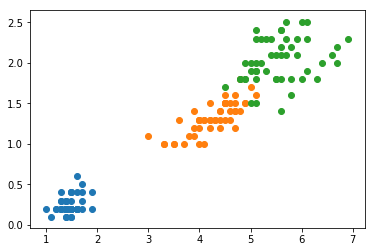

In [20]:
plt.scatter(X[:50, 0], X[:50, 1]) # 처음부터 50번째 (첫번째 꽃 데이터) 의 0번째 요소와 1 번째 요소 시각화
plt.scatter(X[50:100, 0], X[50:100, 1]) 
plt.scatter(X[100:, 0], X[100:, 1])
plt.show()

### 데이터 전처리 및 표준화

In [24]:
# 전처리가 필요없는 데이터이기 때문에 전처리 과정은 필요 없음
# 학습 데이터와 테스트 데이터로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # test_size=0.3: , random_state=0 : 항상 일정한 패턴으로 섞음

# 표준화 작업 : 
sc = StandardScaler()
# 데이터를 표준화하기 전에, 표준 분표를 먼저 구한다 
sc.fit(X_train) # fit: pc학습

# 데이터를 표준화
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 학습

In [25]:
# 학습할 모델 객체를 생성한다
# 로지스틱 회귀는 과적합 현상이 발생할 확률이 매우 높다
# 과적합 : 학습용 데이터에 너무 최적화되어 검증 데이터나 앞으로 발생되는 데이터에 대해 예측 정확도가 떨어지는 현상
# 예측 모델을 L2 정규화(C=1000.0)를 이용해서 데이터 정규화를 하도록 한다. (얼마를 넣을지는 문서에 쓰여있음)
# 여기서는 C라는 변수에 1000.0을 넣어준다 => 과적합 예방
model = LogisticRegression(C=1000.0, random_state=0) 
# 학습한다
model.fit(X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### 모델 검증 및 저장

In [27]:
# 검증용 데이터를 입력해서 예측 결과를 계산한다
y_pred = model.predict(X_test_std) # predict: 예측결과를 계산해주는 함수

# 실제 결과 데이터와 계산된 예측 결과 데이터를 비교해 정확도를 계산한다
score = accuracy_score(y_test, y_pred)
print(f'정확도 : {score}') # 주어진 데이터를 랜덤으로 섞기 때문에 실행할 때마다 결과치는 달라진다 (random_state = 0 사용 가능)

# 모델을 저장한다
with open('logistic.dat', 'wb') as fp:
    pickle.dump(sc, fp)
    pickle.dump(model, fp)

print('저장완료')

정확도 : 0.9777777777777777
저장완료


### 활용

In [30]:
# 파일로부터 학습 모델을 복원한다
with open('logistic.dat', 'rb') as fp:
    sc2 = pickle.load(fp)
    model2 = pickle.load(fp)

X2 = [
    [1.4, 0.2], [1.3, 0.2], [1.5, 0.2],
    [4.5, 1.5], [4.1, 1.0], [4.5, 1.5],
    [5.2, 2.0], [5.4, 2.3], [5.1, 1.8]
]

X2_std = sc.transform(X2)

# 예측 결과를 계산한다
y2_pred = model2.predict(X2_std)

for value in y2_pred:
    print(names[value])

setosa
setosa
setosa
versicolor
versicolor
versicolor
virginica
virginica
virginica
